<a href="https://colab.research.google.com/github/chetanimg/Malaria-Detection/blob/master/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Datos"

Test  Untitled0.ipynb  Validation


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
600/600 [==============================] - 59s 98ms/step - loss: 0.6432 - acc: 0.6211 - val_loss: 2.1454 - val_acc: 0.0000e+00
Epoch 2/10
600/600 [==============================] - 58s 96ms/step - loss: 0.3063 - acc: 0.8820 - val_loss: 0.8024 - val_acc: 0.6419
Epoch 3/10
600/600 [==============================] - 58s 97ms/step - loss: 0.1606 - acc: 0.9485 - val_loss: 0.3538 - val_acc: 0.8993
Epoch 4/10
600/600 [==============================] - 56s 93ms/step - loss: 0.1421 - acc: 0.9539 - val_loss: 0.2752 - val_acc: 0.9272
Epoch 5/10
600/600 [==============================] - 58s 96ms/step - loss: 0.1422 - acc: 0.9551 - val_loss: 0.2463 - val_acc: 0.9194
Epoch 6/10
600/600 [==============================] - 59s 98ms/step - loss: 0.1377 - acc: 0.9569 - val_loss: 0.2053 - val_acc: 0.9329
Epoch 7/10
600/600 [==============================] - 57s 96ms/step - loss: 0.1265 - acc: 0.9613 - val_loss: 

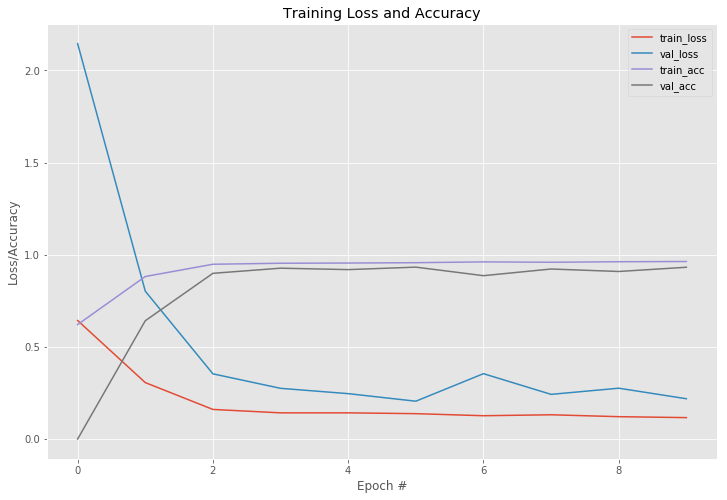

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time



# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Datos/Test'
validation_data_dir = '/content/drive/My Drive/Datos/Validation'

# Pre-procesamiento de imágenes

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

H = model.fit_generator(
        train_generator,
        steps_per_epoch=600,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=100,
)

import matplotlib.pyplot as plt
import numpy as np
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()